In [2]:
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
#%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 200

#set initial random state
rs = 328537
np.random.seed(rs)

In [3]:
DATASETPATH = "./data/DSL_Winter_Project_2024/DSL_Winter_Project_2024/development.csv"
dataset = pd.read_csv(DATASETPATH)

display(dataset)

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],pmax[3],negpmax[3],area[3],tmax[3],rms[3],pmax[4],negpmax[4],area[4],tmax[4],rms[4],pmax[5],negpmax[5],area[5],tmax[5],rms[5],pmax[6],negpmax[6],area[6],tmax[6],rms[6],pmax[7],negpmax[7],area[7],tmax[7],rms[7],pmax[8],negpmax[8],area[8],tmax[8],rms[8],pmax[9],negpmax[9],area[9],tmax[9],rms[9],pmax[10],negpmax[10],area[10],tmax[10],rms[10],pmax[11],negpmax[11],area[11],tmax[11],rms[11],pmax[12],negpmax[12],area[12],tmax[12],rms[12],pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14],pmax[15],negpmax[15],area[15],tmax[15],rms[15],pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,72.2,1.456865,3.811328,-23.747293,3.621973,15.200000,1.531228,4.893027,-18.008972,7.215259,70.594160,0.938042,9.322305,-19.477101,5.520791,72.400000,1.412877,3.077338,-19.239130,2.079597,28.400000,1.242361,3.633856,-17.555292,1.456941,66.400000,1.521403,26.581253,-15.625539,13.374258,72.200000,1.211460,99.361264,-56.828006,48.422567,72.0,0.971254,42.068393,-19.716336,23.152819,72.000000,1.285425,12.438458,-18.148151,7.611376,72.200000,0.904157,4.559802,-18.432141,2.288938,38.40000,0.939772,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969,149.648736,-18.546884,146.036298,72.276594,1.196239,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,55.0,1.709002,3.940369,-5.427002,3.444678,200.200000,1.172497,5.549379,-4.670676,6.666403,156.598535,1.109768,9.373914,-3.896777,6.821667,71.000000,1.489011,5.424356,-4.675986,5.481520,70.600000,1.684811,5.126883,-4.857126,4.561109,181.200000,1.356535,27.797015,-11.742902,14.334657,71.000000,1.248869,96.062561,-58.803436,47.559857,70.8,1.646606,38.690210,-19.613623,20.574321,70.800000,1.236410,12.326212,-5.670920,8.025536,119.600000,1.201039,15.498431,-6.770750,11.107231,119.84105,1.483650,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953,148.942977,-4.697864,171.081604,71.065221,1.534433,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,28.0,1.373336,4.903412,-4.559235,1.223700,204.600000,1.508628,3.795407,-4.761539,1.397493,71.800000,1.121483,7.499896,-5.343427,7.260222,71.800000,1.547936,5.846233,-5.021164,6.073777,71.541859,1.529981,4.284341,-5.049019,3.330127,17.229922,1.636174,23.163651,-11.581955,11.901321,71.800000,1.712700,93.767398,-62.801328,46.121189,71.6,1.509499,40.337067,-23.637970,19.456946,71.600000,1.973803,9.253250,-4.282883,4.517316,71.800000,1.995394,4.168692,-4.282668,2.504671,141.60000,2.004948,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951,153.494632,-4.584915,137.502422,71.869933,1.010175,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,14.0,1.115078,3.791672,-4.981216,2.985681,104.000000,1.374108,4.848719,-3.985501,5.184150,197.725932,1.849099,10.422260,-4.916791,5.480527,72.400000,0.809550,5.157927,-3.594675,9.393185,72.081513,1.633162,2.999829,-6.250171,2.250264,1.600000,1.737832,26.592899,-10.409299,12.231570,72.200000,0.825131,89.620438,-62.658493,48.821906,72.0,1.945644,37.796774,-21.114725,20.897897,72.000000,1.224526,10.900876,-5.595096

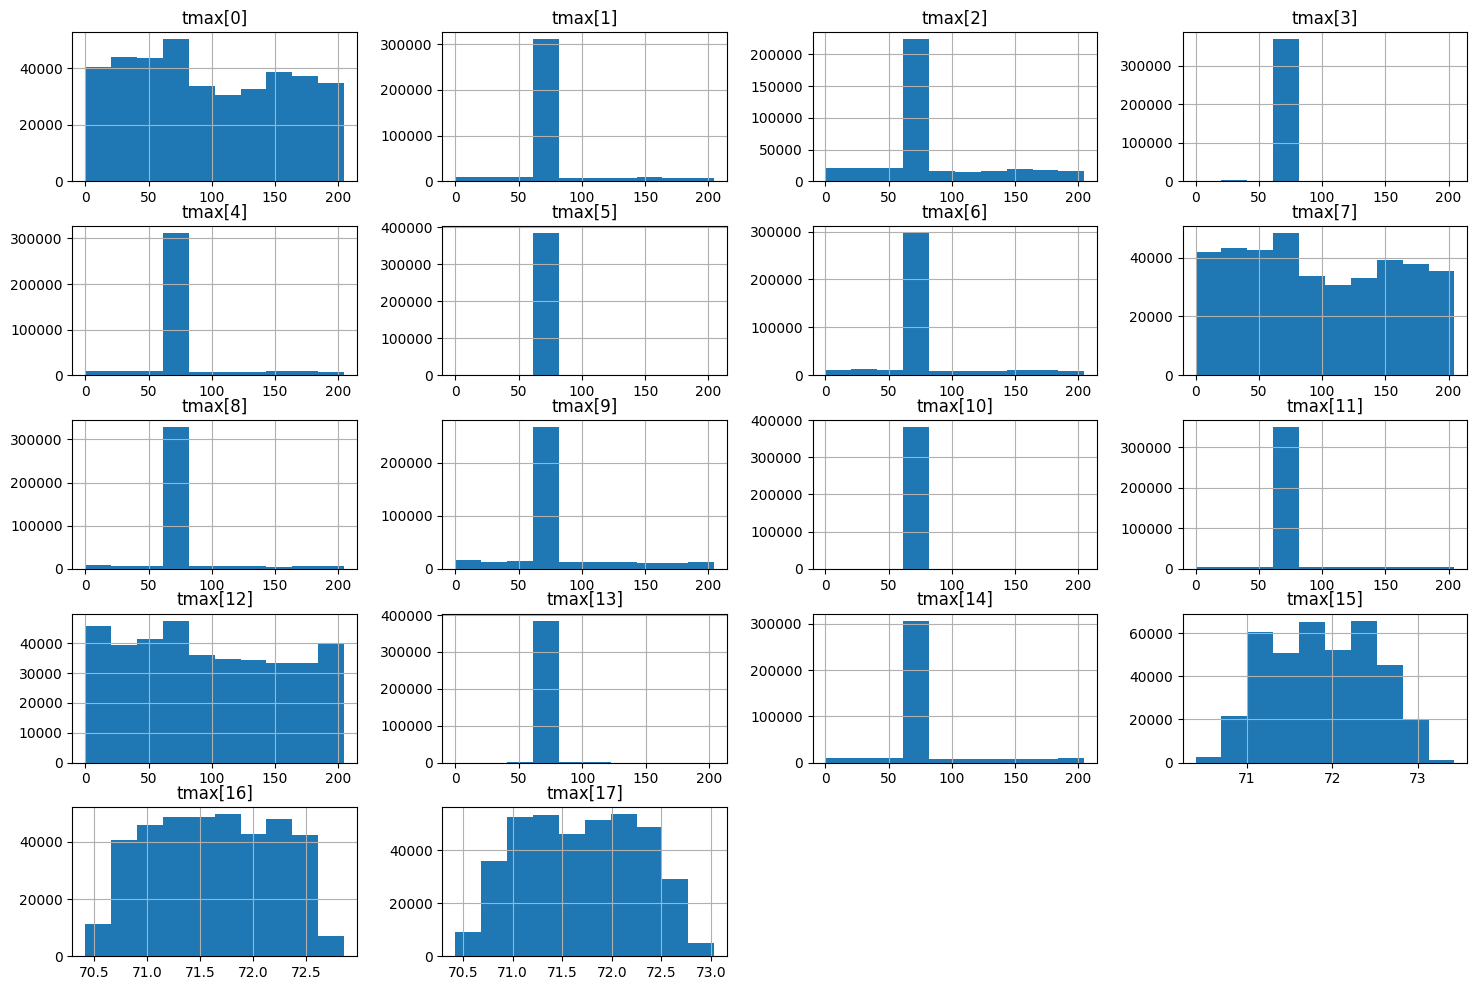

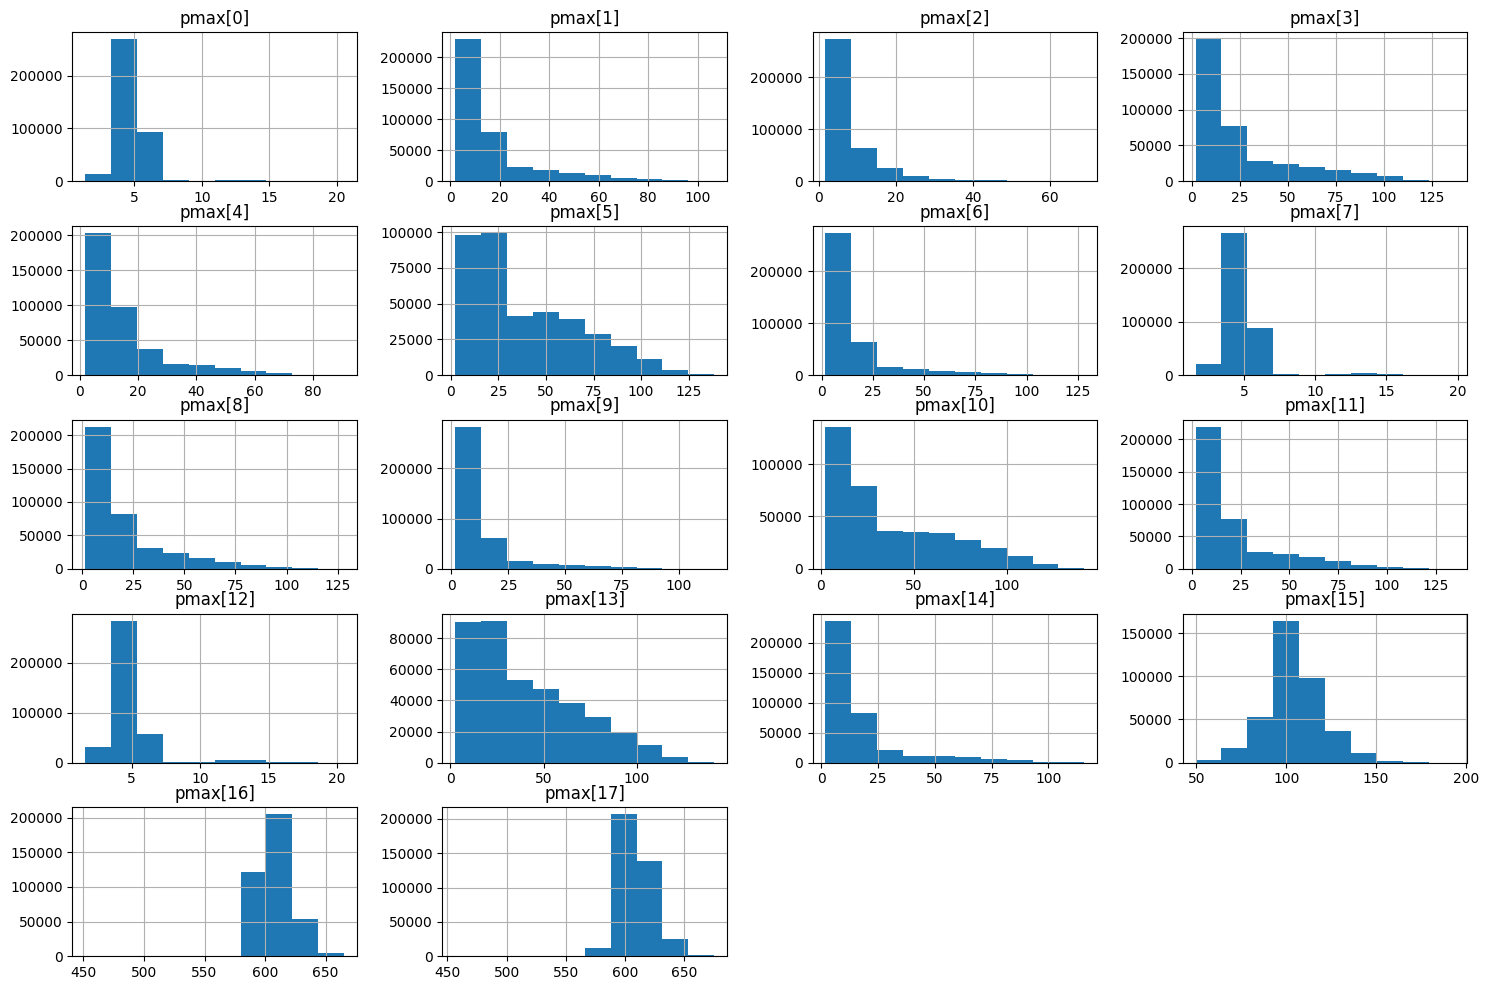

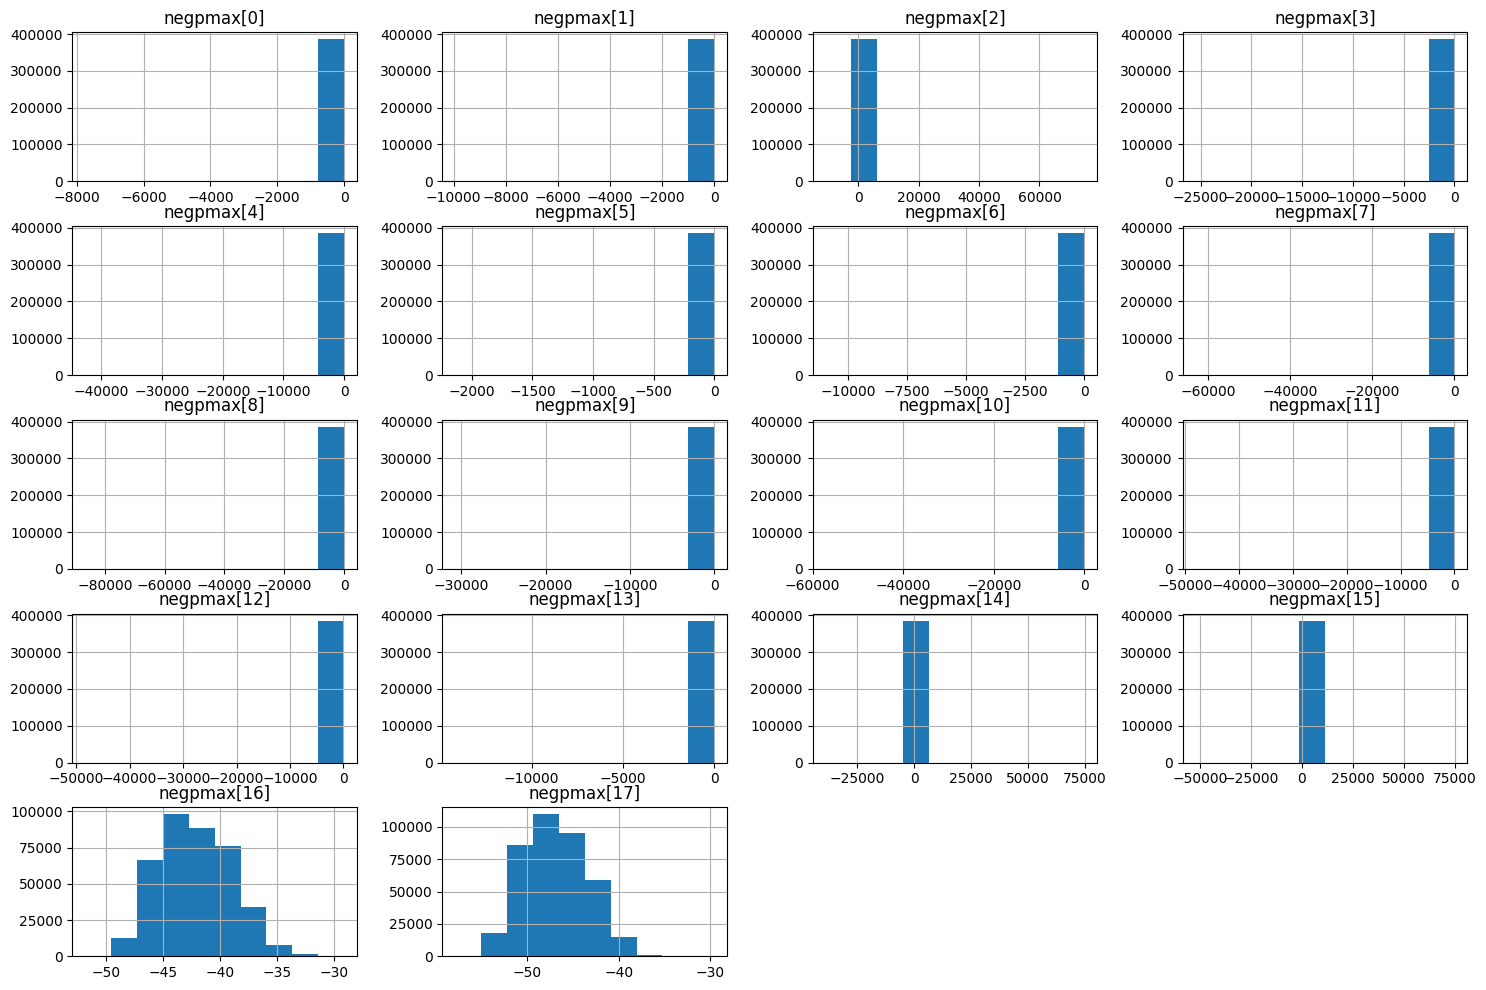

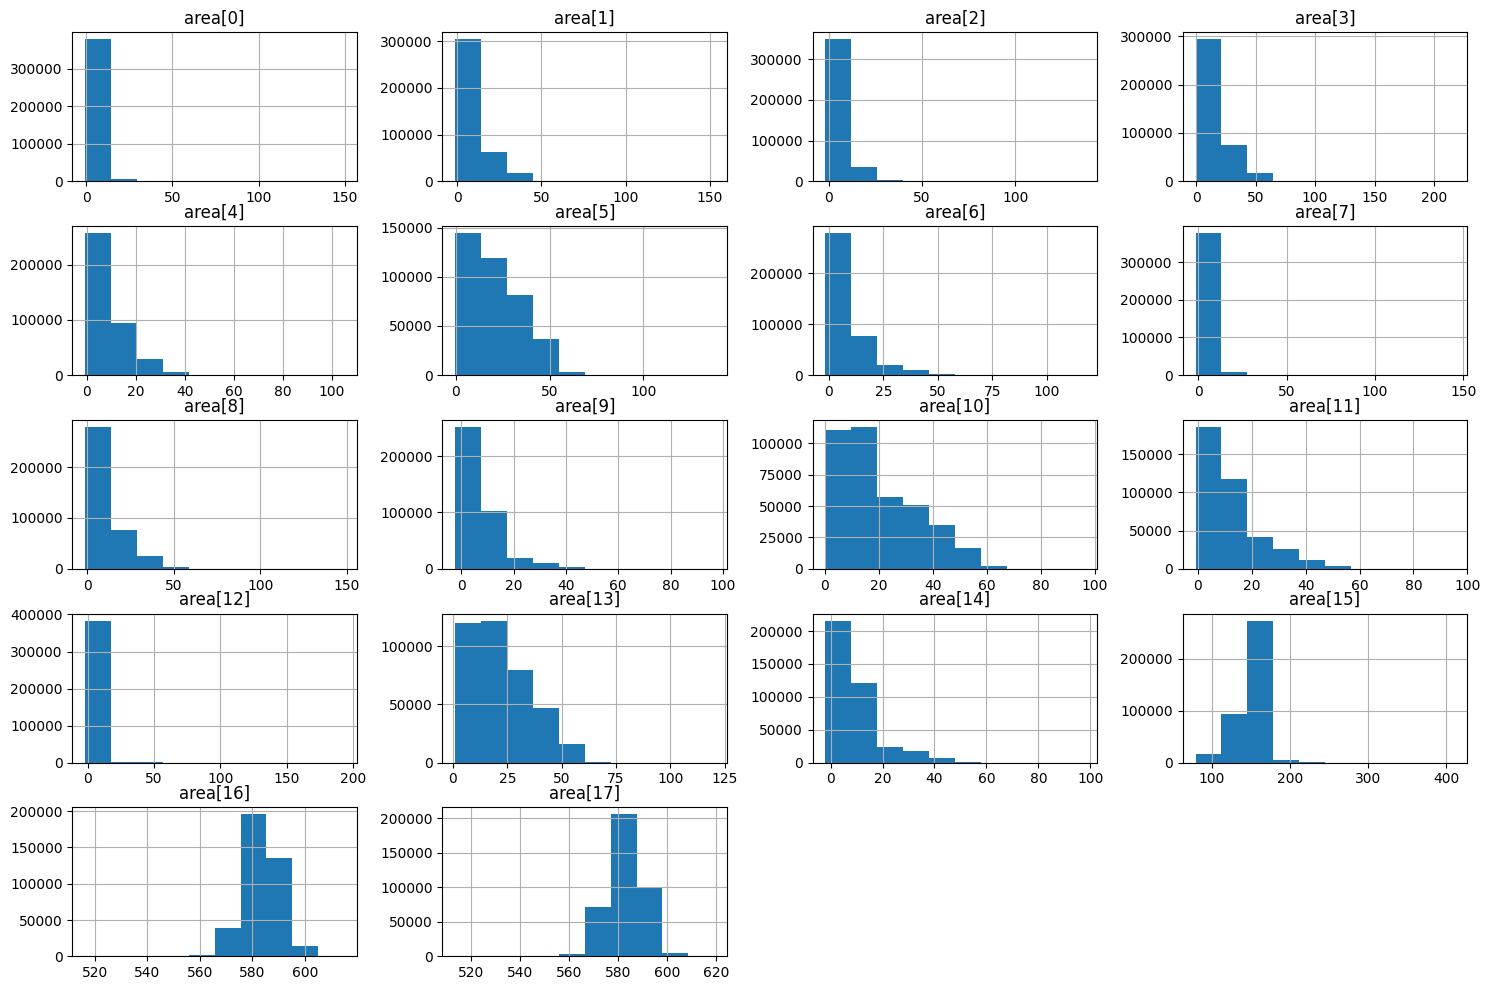

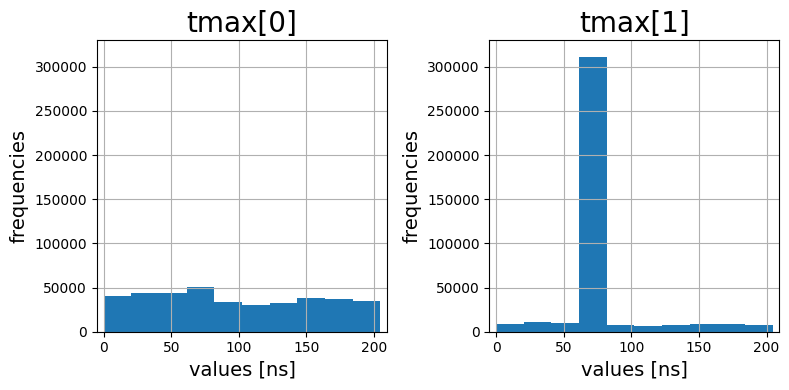

In [87]:
def generateColumnsNames(title, ignore=[]):
    out = []
    for i in range(0, 18):
        if(not i in ignore):
            out.append( title + "[" + str(i) + "]" )
    return out

columnTitles = ["tmax","pmax", "negpmax", "area"]
for columnTitle in columnTitles:
    columns = generateColumnsNames(columnTitle)
    dataset.hist(bins=10, column=columns, figsize=(18,12))


<Figure size 640x480 with 0 Axes>

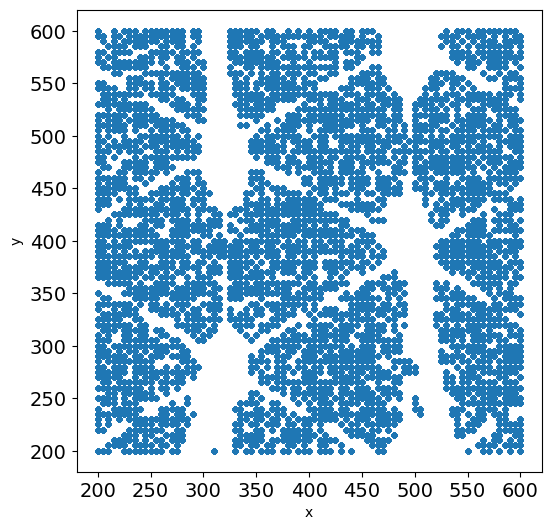

In [89]:
plt.figure()
dataset.plot.scatter("x", "y", alpha=0.1, s=10, figsize=(6,6), fontsize=14)
plt.savefig("target_spatial_distribution.png", format="png")

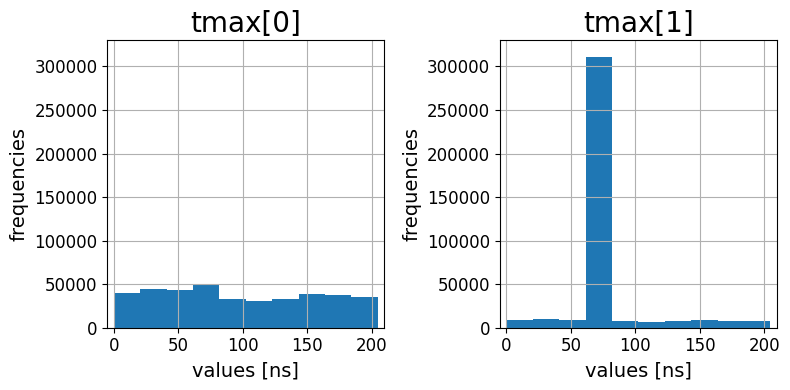

In [106]:
#columns = generateColumnsNames("pmax")
columns = ["tmax[0]", "tmax[1]"]
nrows = 1
fig, ax = plt.subplots(nrows, len(columns)//nrows, figsize=(8, 4))

valmin = np.min(dataset[columns])
valmax = np.max(dataset[columns])

for idx, col in enumerate(columns):
    #x = ax[idx//nrows][idx%nrows]
    x = ax[idx]
    x.hist(dataset[col], bins=10)
    x.set_title(col, fontsize=20)
    x.set_ylim(0, 330000)
    x.set_xlim(valmin -5, valmax + 5)
    x.set_xlabel("values [ns]", fontsize=14)
    x.set_ylabel("frequencies", fontsize=14)
    x.tick_params(labelsize=12)
    x.grid()

plt.tight_layout()
plt.savefig("tmax_distribution_comparison.pdf", format="pdf")

In [110]:
dataset.describe()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],pmax[3],negpmax[3],area[3],tmax[3],rms[3],pmax[4],negpmax[4],area[4],tmax[4],rms[4],pmax[5],negpmax[5],area[5],tmax[5],rms[5],pmax[6],negpmax[6],area[6],tmax[6],rms[6],pmax[7],negpmax[7],area[7],tmax[7],rms[7],pmax[8],negpmax[8],area[8],tmax[8],rms[8],pmax[9],negpmax[9],area[9],tmax[9],rms[9],pmax[10],negpmax[10],area[10],tmax[10],rms[10],pmax[11],negpmax[11],area[11],tmax[11],rms[11],pmax[12],negpmax[12],area[12],tmax[12],rms[12],pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14],pmax[15],negpmax[15],area[15],tmax[15],rms[15],pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.00000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,397.723735,404.106355,4.866423,-5.046162,4.330495,97.593811,1.340462,16.510543,-9.187917,10.504198,77.383326,1.335660,8.784017,-5.596777,6.288025,84.221963,1.356628,26.457888,-13.964902,15.282057,72.975241,1.325691,14.947826,-8.454200,9.521325,77.332988,1.375895,39.333002,-20.186649,21.714331,71.544003,1.363732,14.907669,-8.814084,9.296706,78.324800,1.371803,4.849883,-5.309727,4.236358,97.900006,1.346945,20.503279,-12.218777,11.857352,75.94907,1.389921,12.505530,-8.171642,7.843535,80.758572,1.377497,37.827489,-21.218853,20.479499,71.874087,1.408877,22.118955,-12.597360,12.735731,74.250317,1.415314,4.872721,-5.641027,3.818860,97.552845,1.364507,41.233983,-22.280679,22.437697,71.709501,1.411607,16.656853,-9.865294,9.924054,77.455162,1.439037,104.181567,-5.237765,148.851283,71.888650,1.370949,608.650804,-42.152047,583.569358,71.628631,0.452944,609.060121,-46.921923,583.060292,71.695363,0.371027
std,120.593104,113.652228,1.481220,15.877804,3.489414,59.444364,0.342167,16.781018,29.955290,8.444105,30.102913,0.340729,7.692692,173.289844,4.758113,43.514353,0.346268,25.397517,68.418678,12.079510,14.680792,0.338356,13.394484,115.439999,6.923761,29.896806,0.352680,27.899214,17.294225,13.035837,4.008432,0.352439,16.613431,26.239272,8.253096,32.690131,0.352000,1.487651,106.865747,3.277200,59.795323,0.352530,20.175681,184.963808,9.633506,26.31364,0.353814,13.862611,73.012116,6.940520,37.492926,0.349208,30.010446,124.881360,13.938797,6.938057,0.355428,21.599092,101.812968,10.309472,20.631776,0.356551,1.748889,120.887383,2.865206,60.045805,0.342913,27.992784,35.573168,13.082657,2.964976,0.358423,17.784631,152.735946,8.719940,30.938912,0.366330,16.031714,150.181112,15.418415,0.598055,0.350003,13.723698,3.158175,6.646175,0.577619,0.299456,13.928735,3.478838,6.992203,0.585629,0.081983
min,200.000000,200.000000,1.394440,-7741.109923,-0.582573,0.000000,0.275854,2.028134,-9930.114637,-0.997

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

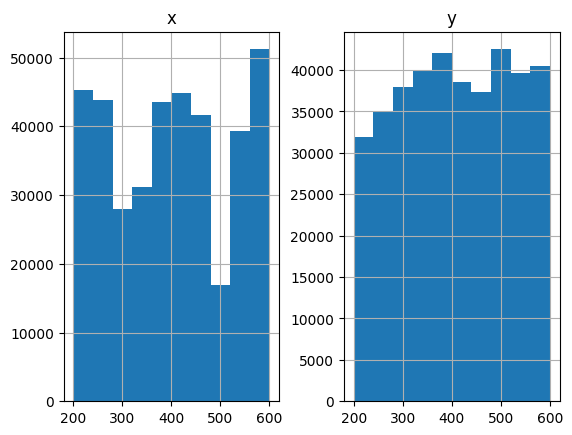

In [109]:
dataset[['x', 'y']].hist()

In [21]:
def generateColumnsNamesFromIndexes(indexes):
    out = []
    for index in indexes:
        for label in ["pmax", "negpmax", "area", "tmax", "rms"]:
            out.append(label + "[" + str(index) + "]")
    return out

regressionTargets = ['x', 'y']
noisyIndexes = [0, 7, 12, 15, 16, 17]
noisyFeatures= generateColumnsNamesFromIndexes(noisyIndexes)
featuresLabels = dataset.columns.drop(np.hstack([regressionTargets, noisyFeatures]))
dataset_shuff = dataset.sample(random_state=rs, frac=1)  #shuffle the dataset
X_df = dataset_shuff[featuresLabels]
Y_df = dataset_shuff[regressionTargets]

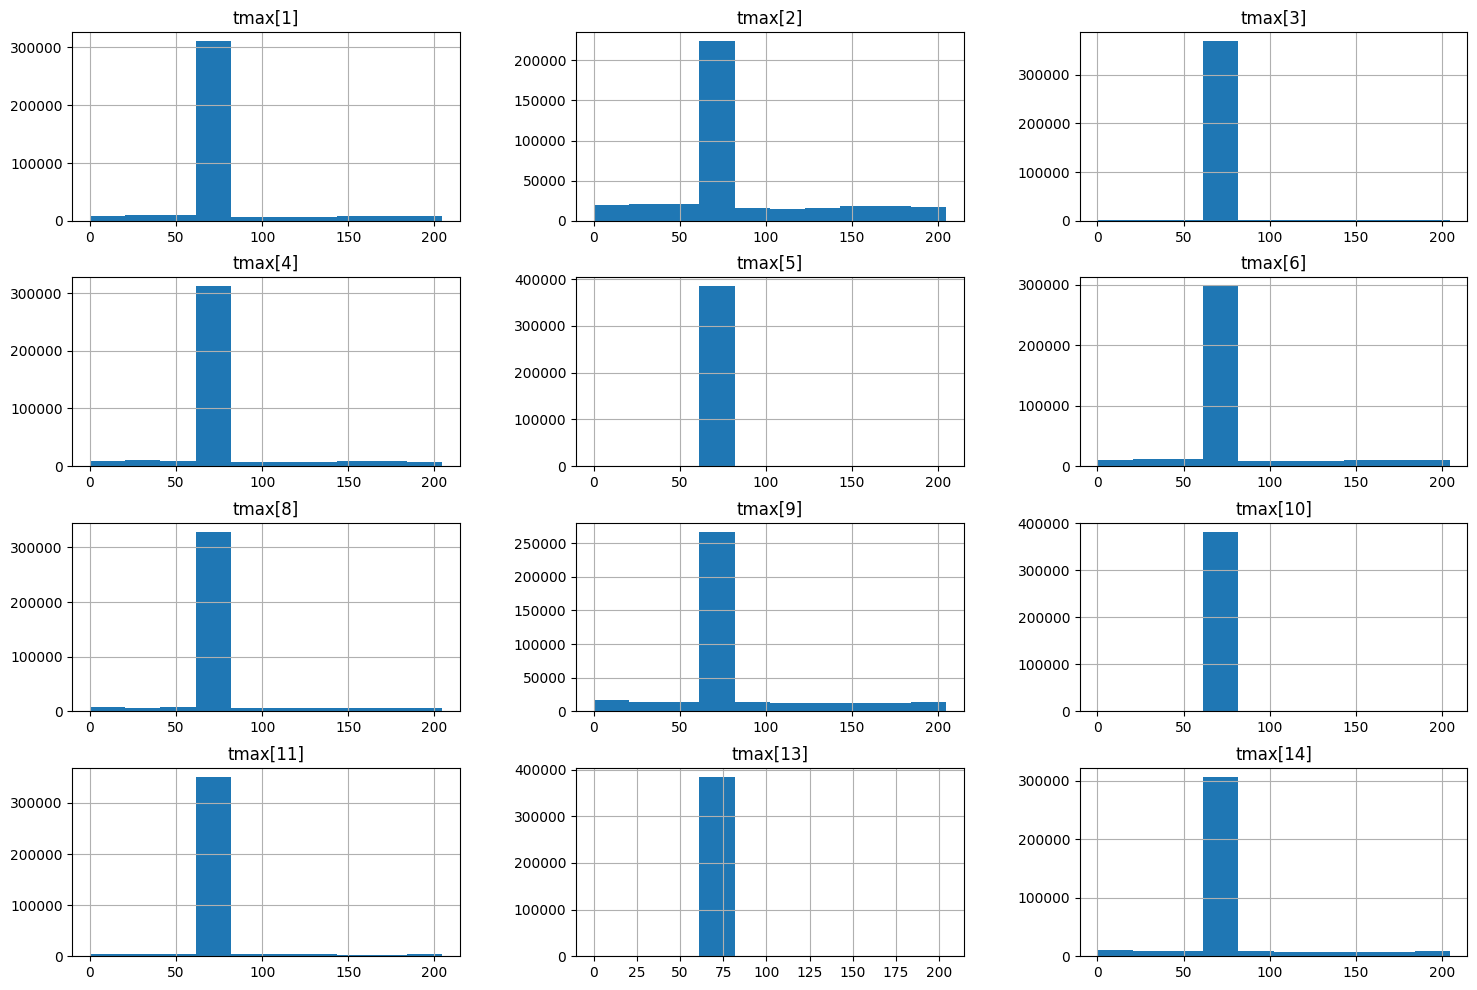

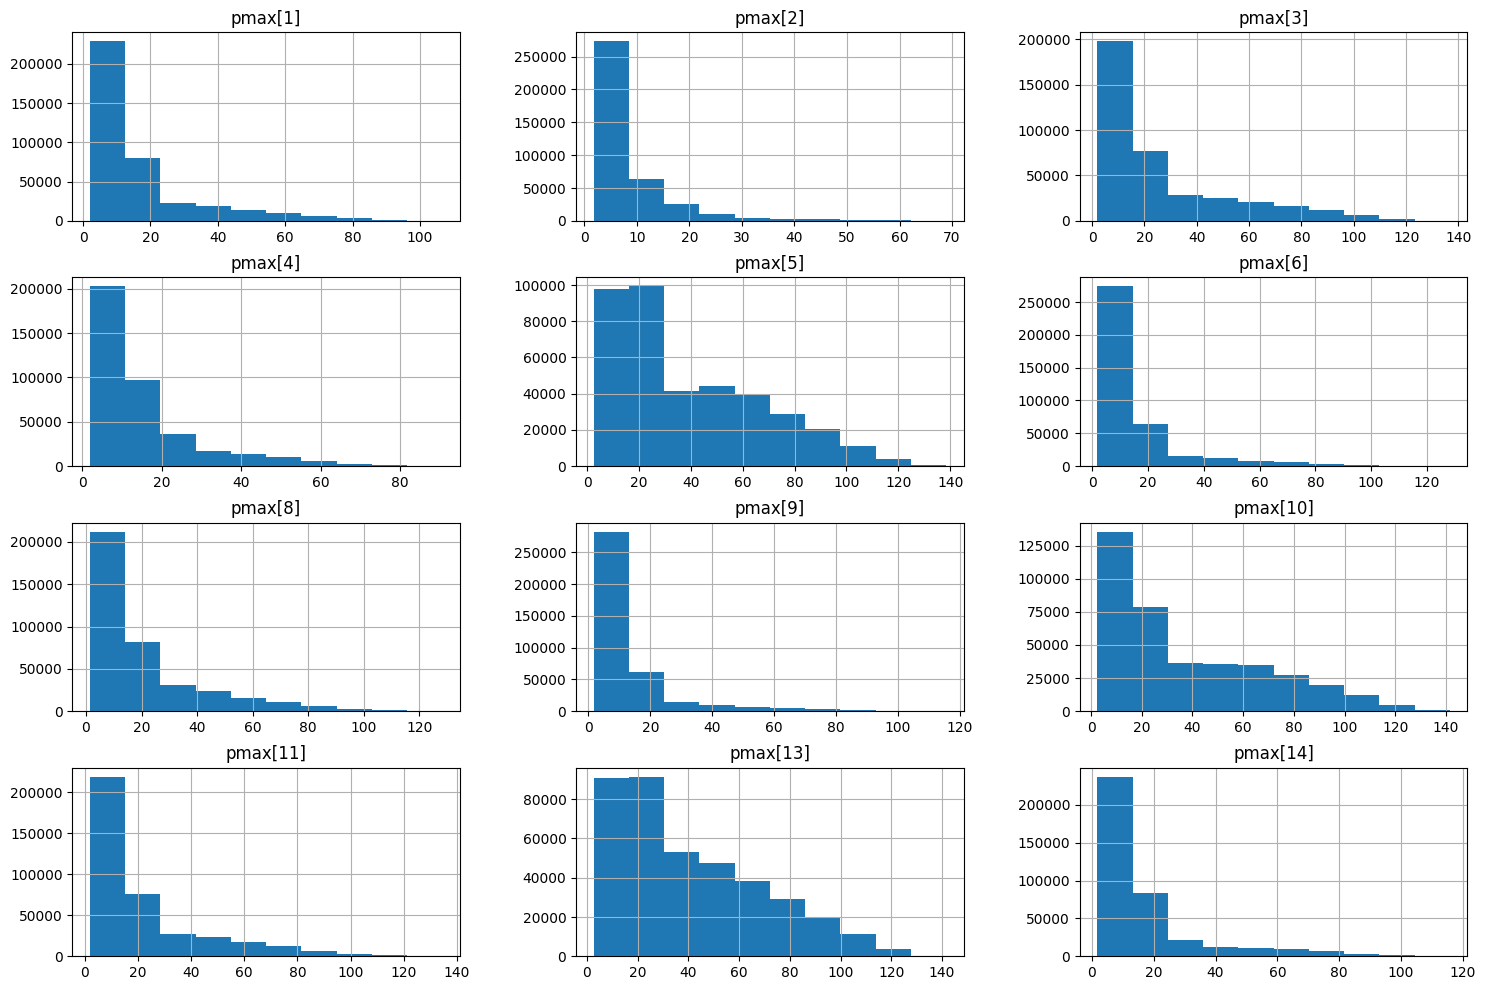

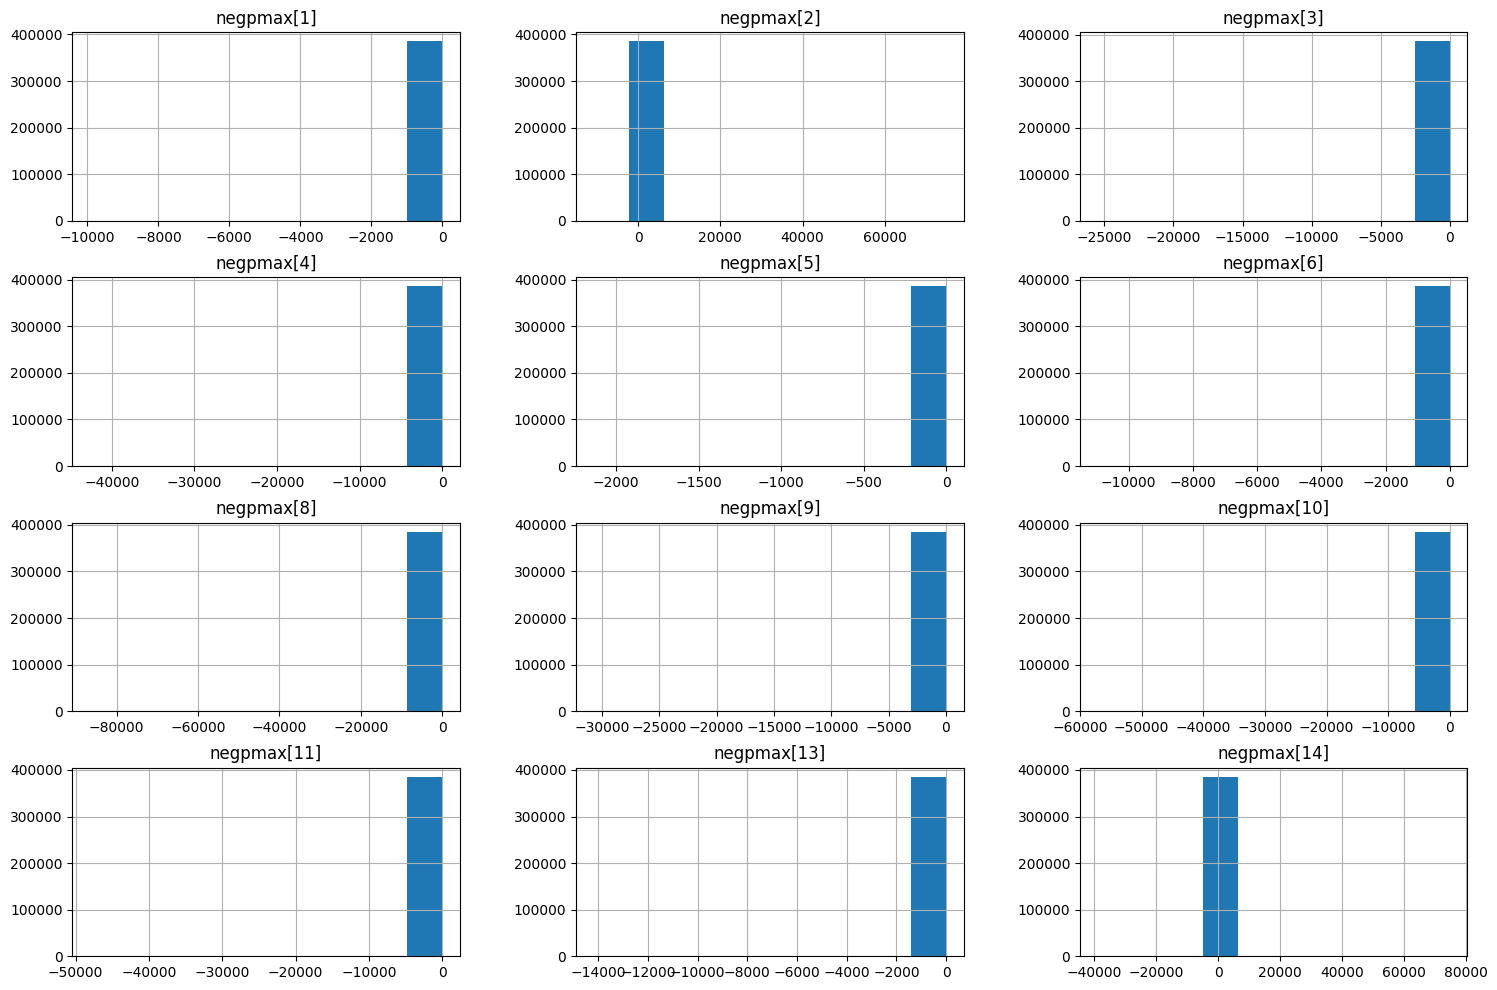

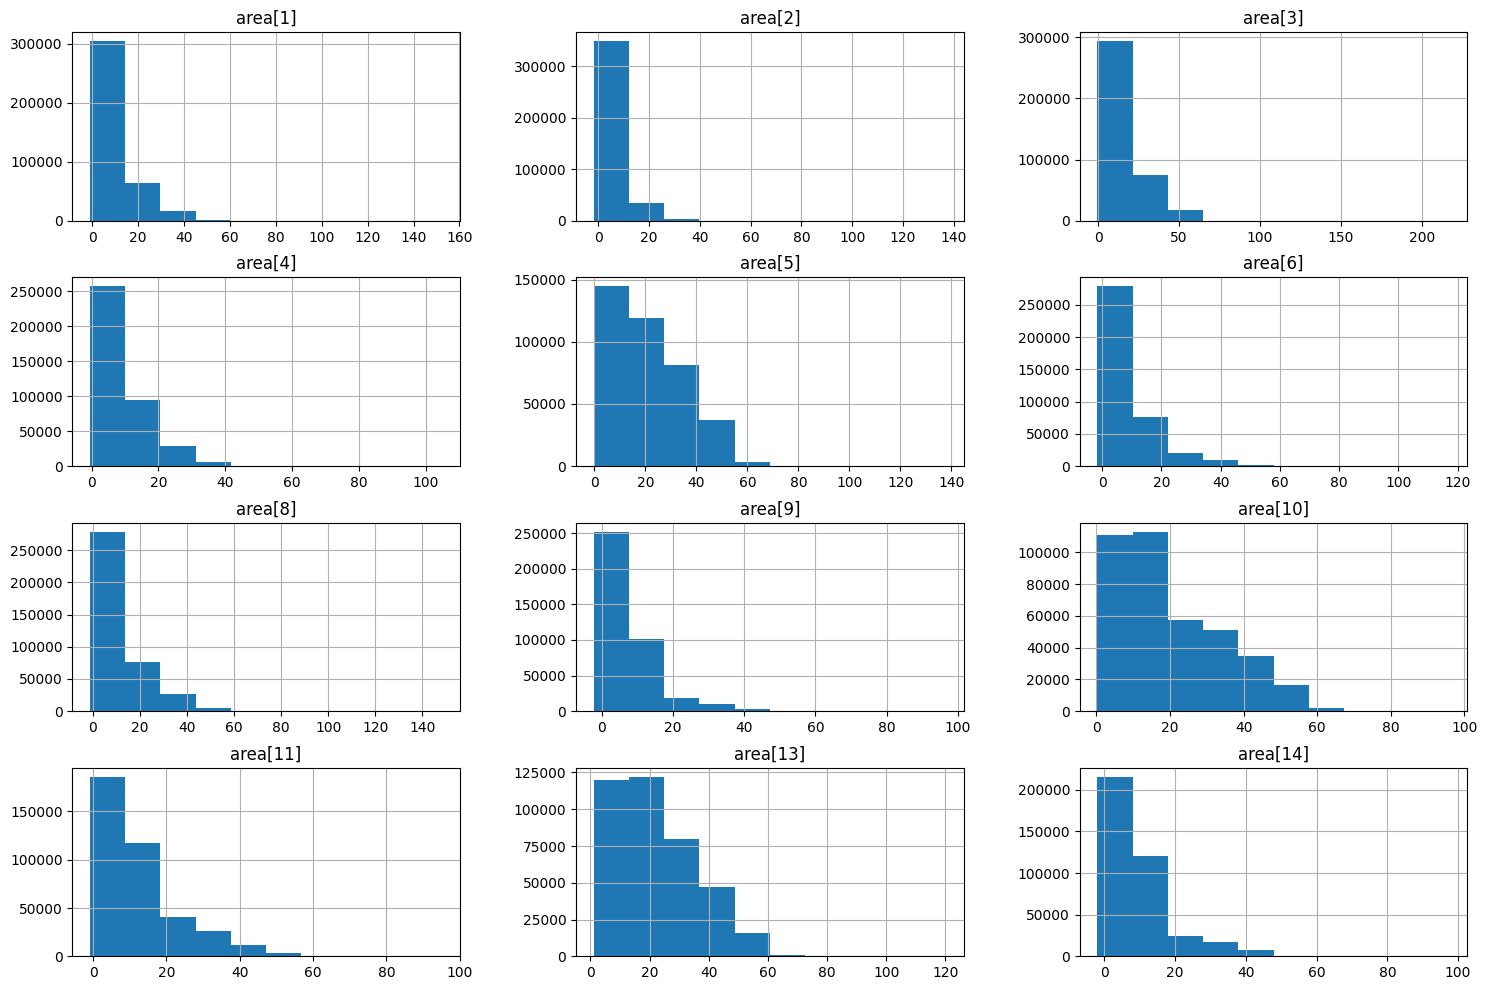

In [28]:
columnTitles = ["tmax", "pmax", "negpmax", "area"]
for columnTitle in columnTitles:
    columns = generateColumnsNames(columnTitle, ignore=noisyIndexes)
    dataset.hist(bins=10, column=columns, figsize=(18,12))

<Figure size 640x480 with 0 Axes>

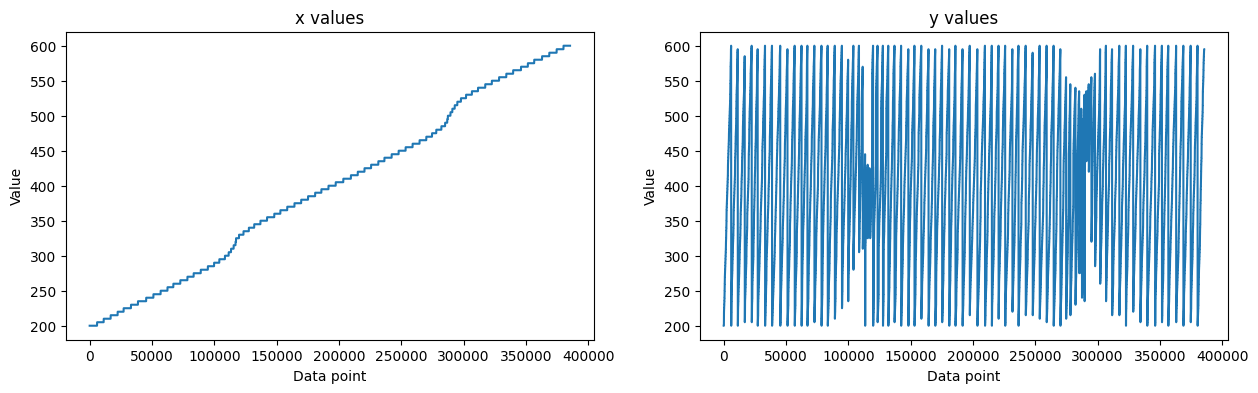

In [6]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(Y_df['x'])
ax[0].set_title("x values")
ax[0].set_xlabel("Data point")
ax[0].set_ylabel("Value")
ax[1].plot(Y_df['y'])
ax[1].set_title("y values")
ax[1].set_xlabel("Data point")
ax[1].set_ylabel("Value")
plt.show()

<Figure size 640x480 with 0 Axes>

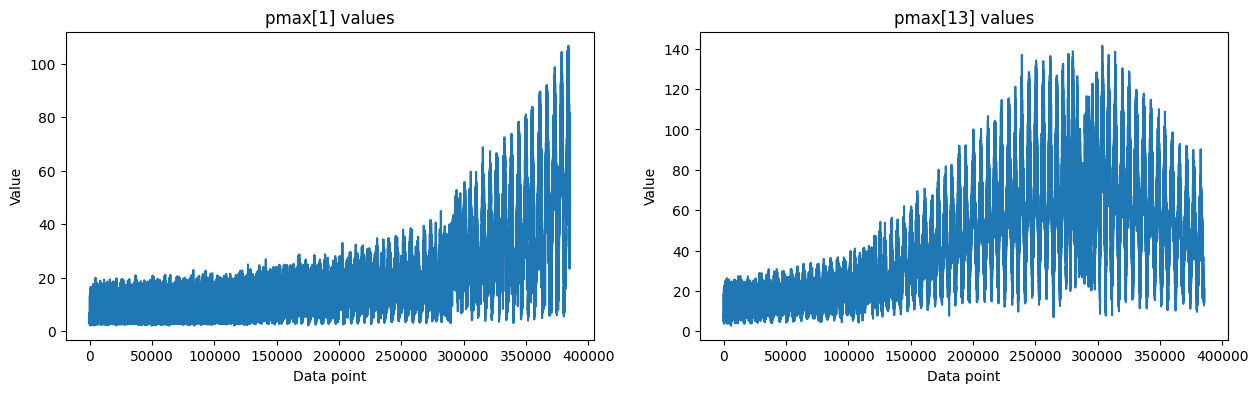

In [7]:
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(X_df['pmax[1]'])
ax[0].set_title("pmax[1] values")
ax[0].set_xlabel("Data point")
ax[0].set_ylabel("Value")
ax[1].plot(X_df['pmax[13]'])
ax[1].set_title("pmax[13] values")
ax[1].set_xlabel("Data point")
ax[1].set_ylabel("Value")
plt.show()

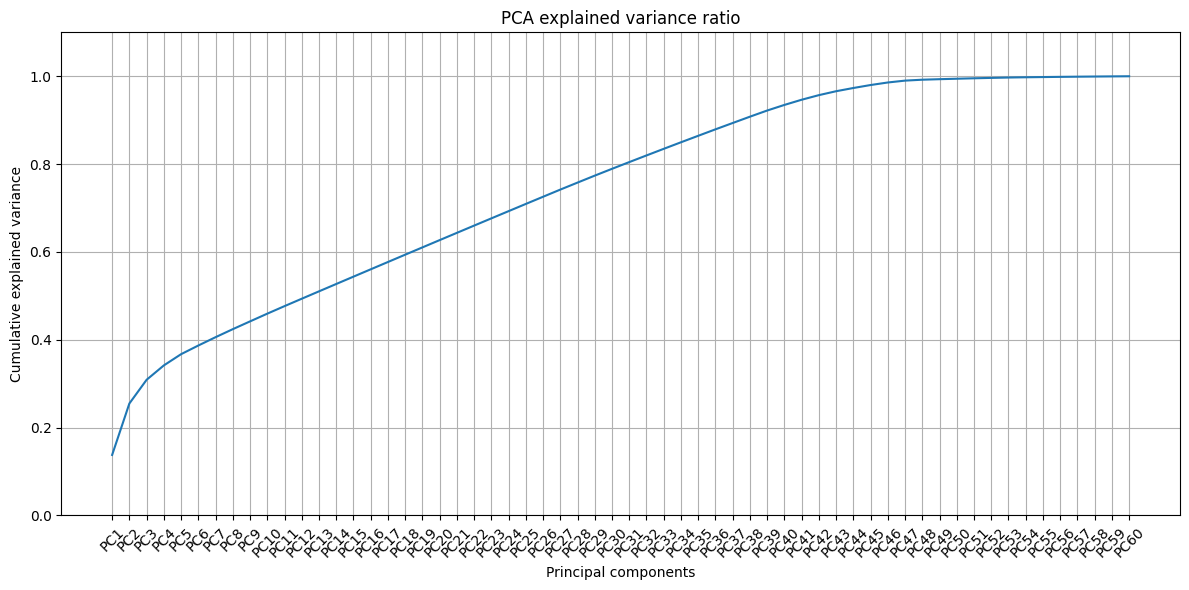

PCA(n_components=31)

In [5]:
pca = PCA()
scaler = StandardScaler()

X_sc = scaler.fit_transform(X_df.values)

pca.fit(X_sc)
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA explained variance ratio')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca.n_features_in_),
labels=[f'PC{i + 1}' for i in range(pca.n_features_in_)],
rotation=45)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.tight_layout()
plt.show()

pca_31 = PCA(n_components=31)
pca_31.fit(X_sc)


In [9]:
#pd.concat([Y_df, X_df], axis="columns").corr()
pd.concat([Y_df, X_df], axis="columns").corr()[generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes)]

,area[1],area[2],area[3],area[4],area[5],area[6],area[8],area[9],area[10],area[11],area[13],area[14],pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]
x,0.700687,0.374873,0.418804,-0.231869,-0.488755,-0.549963,-0.765399,-0.518958,-0.447658,0.363924,0.658242,0.668360,0.726619,0.477606,0.416501,-0.247361,-0.493251,-0.569413,-0.779363,-0.545835,-0.447803,0.361139,0.661260,0.679072
y,0.282344,0.376961,0.691197,0.700602,0.540429,0.465759,-0.074073,-0.458683,-0.646360,-0.700070,-0.117665,-0.352952,0.307673,0.516068,0.703649,0.760833,0.548665,0.490734,-0.086546,-0.490673,-0.658605,-0.714181,-0.126507,-0.366370
pmax[1],0.938971,0.538303,0.521822,-0.109415,-0.345956,-0.304583,-0.444430,-0.327988,-0.477042,-0.124584,0.405888,0.304834,1.000000,0.705026,0.523930,-0.115198,-0.352197,-0.314942,-0.449583,-0.340326,-0.478519,-0.136645,0.405503,0.300509
negpmax[1],-0.262689,-0.152683,-0.128307,0.036695,0.100243,0.071983,0.099132,0.071926,0.119734,0.051929,-0.078236,-0.061816,-0.286278,-0.200427,-0.129402,0.037074,0.101185,0.074068,0.098589,0.073098,0.118837,0.054215,-0.077677,-0.059546
area[1],1.000000,0.506243,0.495986,-0.107139,-0.325164,-0.297884,-0.433155,-0.320854,-0.448871,-0.098634,0.412177,0.304020,0.938971,0.656216,0.495165,-0.115601,-0.332792,-0.309423,-0.440033,-0.335047,-0.451493,-0.111431,0.411205,0.299327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pmax[14],0.299327,-0.034683,-0.151902,-0.336153,-0.483750,-0.339090,-0.413906,-0.263768,-0.264846,0.533192,0.468270,0.962421,0.300509,-0.070002,-0.163507,-0.361447,-0.484719,-0.345906,-0.415195,-0.276081,-0.263912,0.535764,0.477135,1.000000
negpmax[14],-0.013768,0.004331,0.011642,0.015925,0.025462,0.012980,0.020184,0.014247,0.019889,-0.027139,-0.019024,-0.059206,-0.013589,0.006521,0.011955,0.016995,0.024852,0.012964,0.020153,0.014907,0.019625,-0.027130,-0.019487,-0.062532
area[14],0.304020,-0.022862,-0.134440,-0.327657,-0.470662,-0.338401,-0.409315,-0.258607,-0.252560,0.523162,0.464292,1.000000,0.304834,-0.055080,-0.146200,-0.353612,-0.472349,-0.346440,-0.411929,-0.272327,-0.253329,0.524076,0.470878,0.962421
tmax[14],-0.121765,-0.058506,-0.076048,0.103546,0.099176,0.182867,0.177368,0.102823,-0.002033,-0.126486,-0.189325,-0.131687,-0.121550,-0.071625,-0.073185,0.114310,0.102081,0.193127,0.183235,0.111928,-0.001710,-0.123833,-0.188431,-0.127377


## Test set split

In [70]:
ratio = 0.2
test_length = int(len(X_df) * 0.2)
train_length = len(X_df) - test_length
test_mask = np.array(test_length * [True] + train_length * [False])
np.random.shuffle(test_mask)
X_test = X_df.values[test_mask, :]
Y_test = Y_df.values[test_mask, :]
X_train = X_df.values[~test_mask, :]
Y_train = Y_df.values[~test_mask, :]

#tain-test split on a subset of features
X_red_df = X_df[generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes) + generateColumnsNames("negpmax", ignore=noisyIndexes)]
X_test_red = X_red_df.values[test_mask, :]
X_train_red = X_red_df.values[~test_mask, :]

## Regression

In [6]:
def euc_dist(Y, Y_pred):
    #return np.sqrt(((Y_pred - Y_test)**2).sum(axis=1)).sum(axis=0) / Y_pred.shape[0]
    return np.sqrt(((Y - Y_pred)**2).sum(axis=1)).mean()

euc_dist_scorer = make_scorer(euc_dist)

In [19]:
#linear regression 
linReg = LinearRegression()
linReg.fit(X_train, Y_train)
Y_pred = linReg.predict(X_test)
print(f"Linear regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Linear regression. Euclidean distance score: 17.69 


In [20]:
sorted(zip(X_red_df.columns, linReg.feature_importances_), key=lambda x: x[1], reverse=True)

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

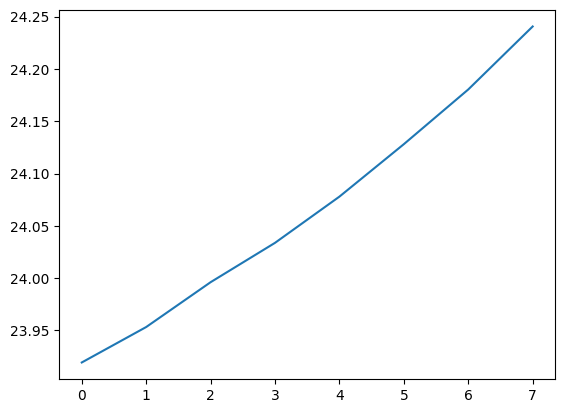

Lasso grid search results. Best params: {'alpha': 0.2}
Lasso regression. Euclidean distance score: 17.70 


In [11]:
#lasso regression
params = {
    "alpha": np.arange(0.2, 1.8, 0.2)
}
scores = []
for config in ParameterGrid(params):
    reg = Lasso(random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Lasso grid search results. Best params: {best_params}")

#evaluate on best params
lassoReg = Lasso(random_state=rs, **best_params)
lassoReg.fit(X_train, Y_train)
Y_pred = lassoReg.predict(X_test)
print(f"Lasso regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))


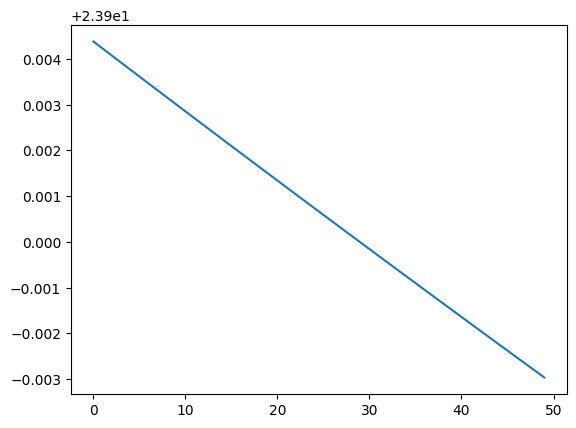

Ridge grid search results. Best params: {'alpha': 4910}
Ridge regression. Euclidean distance score: 17.69 


In [12]:
#Ridge regression
params = {
    "alpha": np.arange(10, 5001, 100)
}
scores = []
for config in ParameterGrid(params):
    reg = Ridge(random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Ridge grid search results. Best params: {best_params}")

#evaluate on best params
ridgeReg = Ridge(random_state=rs, **best_params)
ridgeReg.fit(X_train, Y_train)
Y_pred = ridgeReg.predict(X_test)
print(f"Ridge regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))


## Polynomial regression

In [44]:
#polynomial transformation
PL = PolynomialFeatures(degree=2)
std_scaler = StandardScaler()
X_train_pl = PL.fit_transform(X_train_red)
X_test_pl = PL.transform(X_test_red)

X_train_pl = std_scaler.fit_transform(X_train_pl)
X_test_pl = std_scaler.transform(X_test_pl)

In [45]:
X_train_pl.shape

(308400, 703)

In [48]:
#linear polynomial regression
linReg = LinearRegression()
linReg.fit(X_train_pl, Y_train)
Y_pred = linReg.predict(X_test_pl)
print(f"Linear ploynomial regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Linear ploynomial regression. Euclidean distance score: 11.39 


C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.329e+05, tolerance: 1.967e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.287e+05, tolerance: 2.019e+05
  model = cd_fast.enet_coordinate_descent(


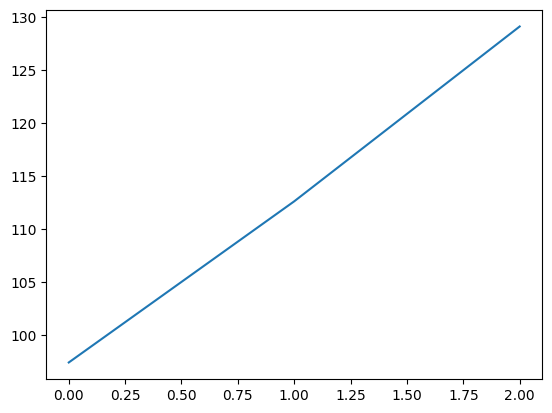

Lasso polynomial grid search results. Best params: {'alpha': 0.2}


C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.946e+06, tolerance: 4.483e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\marco\Documents\poli\dataScienceLab\labs\dslab\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.905e+06, tolerance: 3.985e+05
  model = cd_fast.enet_coordinate_descent(


Lasso polynomial regression. Euclidean distance score: 12.29 


In [14]:
#lasso polynomial regression
params = {
    "alpha": np.arange(0.2, 1.8, 0.6)
}
scores = []
for config in ParameterGrid(params):
    reg = Lasso(selection="random", random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train_pl, Y_train, cv=2, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Lasso polynomial grid search results. Best params: {best_params}")

#evaluate on best params
lassoReg = Lasso(random_state=rs, **best_params)
lassoReg.fit(X_train_pl, Y_train)
Y_pred = lassoReg.predict(X_test_pl)
print(f"Lasso polynomial regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

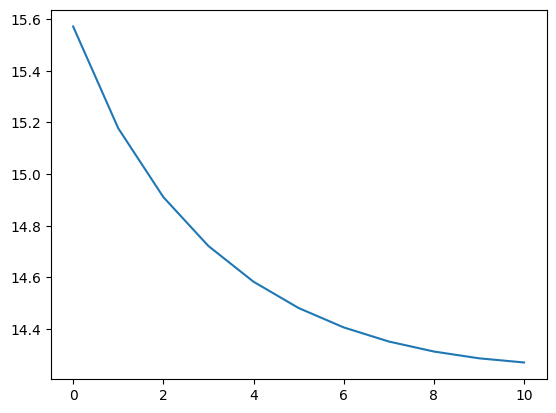

Ridge grid search results. Best params: {'alpha': 500}
Ridge regression. Euclidean distance score: 9.66 


In [17]:
#Ridge regression
params = {
    "alpha": np.arange(100, 501, 40)
}
scores = []
for config in ParameterGrid(params):
    reg = Ridge(random_state=rs, **config)
    scores.append(cross_val_score(reg, X_train_pl, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Ridge grid search results. Best params: {best_params}")

#evaluate on best params
ridgeReg = Ridge(random_state=rs, **best_params)
ridgeReg.fit(X_train_pl, Y_train)
Y_pred = ridgeReg.predict(X_test_pl)
print(f"Ridge regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

## Random forest

In [41]:
RFReg = RandomForestRegressor(random_state=rs, max_samples=0.4, n_jobs=-1)
RFReg.fit(X_train_red, Y_train)
Y_pred = RFReg.predict(X_test_red)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Random forest regression. Euclidean distance score: 5.65 


In [14]:
display(np.array([est.tree_.max_depth for est in RFReg.estimators_]).mean())

31.49

Iteration number: 0
Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Iteration number: 10
Iteration number: 11


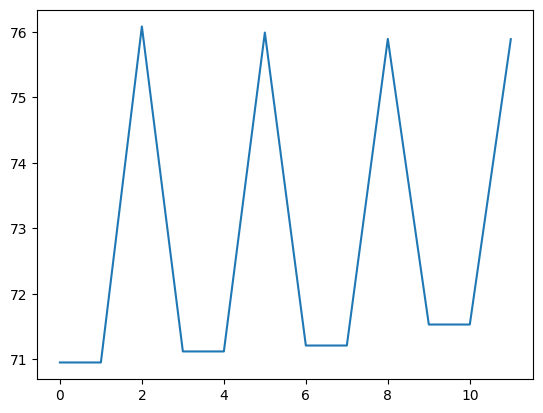

Random forest grid search results. Best params: {'max_depth': 22, 'max_features': 'log2', 'max_samples': 0.4, 'n_estimators': 100}
Random forest regression. Euclidean distance score: 6.09 


In [30]:
#Random forest regression
params = {
    "n_estimators": [100],
    "max_features": ["log2", "sqrt", None],
    "max_samples" : [0.4],
    "max_depth": [22, 25, 28, None]
}
scores = []
iter=0
for config in ParameterGrid(params):
    print(f"Iteration number: {iter}")
    iter += 1
    reg = RandomForestRegressor(random_state=rs, n_jobs=-1, **config)
    scores.append(cross_val_score(reg, X_train_red, Y_train, cv=3, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Random forest grid search results. Best params: {best_params}")

#evaluate on best params
RFReg = RandomForestRegressor(random_state=rs, n_jobs=-1, **best_params)
RFReg.fit(X_train_red, Y_train)
Y_pred = RFReg.predict(X_test_red)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

In [46]:
sorted(zip(X_red_df.columns, RFReg.feature_importances_), key=lambda x: x[1], reverse=True)

[('pmax[8]', 0.3644398852563955),
 ('pmax[11]', 0.25536958082211514),
 ('pmax[10]', 0.16698192163786885),
 ('pmax[5]', 0.0872203705539201),
 ('pmax[13]', 0.06352885105026856),
 ('pmax[9]', 0.021198547370722083),
 ('pmax[3]', 0.014310699021571418),
 ('pmax[4]', 0.008775167278863977),
 ('pmax[1]', 0.005754092247893843),
 ('pmax[6]', 0.00414457122757881),
 ('pmax[14]', 0.0030724328885921),
 ('pmax[2]', 0.0019653687038838764),
 ('area[5]', 0.0006038235634583814),
 ('area[3]', 0.000502279336021352),
 ('area[10]', 0.0004305930032809782),
 ('area[13]', 0.00040063822331656005),
 ('area[14]', 0.00034062186619885547),
 ('area[11]', 0.0002911480742867735),
 ('area[6]', 0.0002032184386641411),
 ('area[8]', 0.00011690032894220608),
 ('area[1]', 0.00010032943065573057),
 ('area[9]', 9.959697109123635e-05),
 ('area[4]', 8.748437239700061e-05),
 ('area[2]', 6.187833201274475e-05)]

## Random forest with PCA

In [16]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

rf_pca = PCA(n_components=31)
X_train_pca = rf_pca.fit_transform(X_train)
X_test_pca = rf_pca.transform(X_test)

In [17]:
RFReg = RandomForestRegressor(random_state=rs, max_samples=0.4, n_jobs=-1)
RFReg.fit(X_train_pca, Y_train)
Y_pred = RFReg.predict(X_test_pca)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Random forest regression. Euclidean distance score: 7.00 


Iteration number: 0. Current parameters: {'max_depth': 22, 'max_features': 'log2', 'max_samples': 0.4, 'n_estimators': 90}
Iteration number: 1. Current parameters: {'max_depth': 22, 'max_features': 'log2', 'max_samples': 0.4, 'n_estimators': 100}
Iteration number: 2. Current parameters: {'max_depth': 22, 'max_features': 'log2', 'max_samples': 0.4, 'n_estimators': 110}
Iteration number: 3. Current parameters: {'max_depth': 22, 'max_features': 'log2', 'max_samples': 1, 'n_estimators': 90}
Iteration number: 4. Current parameters: {'max_depth': 22, 'max_features': 'log2', 'max_samples': 1, 'n_estimators': 100}
Iteration number: 5. Current parameters: {'max_depth': 22, 'max_features': 'log2', 'max_samples': 1, 'n_estimators': 110}
Iteration number: 6. Current parameters: {'max_depth': 22, 'max_features': 'sqrt', 'max_samples': 0.4, 'n_estimators': 90}
Iteration number: 7. Current parameters: {'max_depth': 22, 'max_features': 'sqrt', 'max_samples': 0.4, 'n_estimators': 100}
Iteration number:

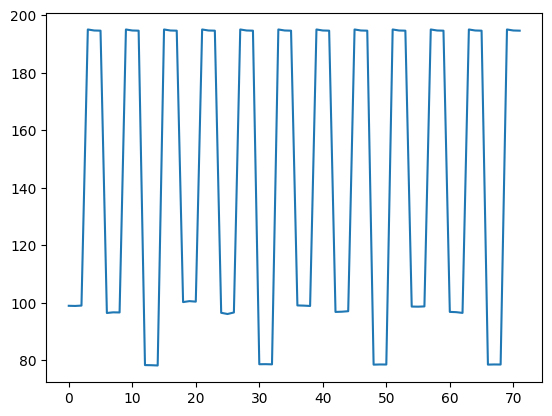

Random forest grid search results. Best params: {'max_depth': 22, 'max_features': None, 'max_samples': 0.4, 'n_estimators': 110}
Random forest regression. Euclidean distance score: 6.99 


In [18]:
#Random forest regression
params = {
    "n_estimators": [90, 100, 110],
    "max_features": ["log2", "sqrt", None],
    "max_samples" : [0.4, 1],
    "max_depth": [22, 25, 28, None]
}
scores = []
iter=0
for config in ParameterGrid(params):
    print(f"Iteration number: {iter}. Current parameters: {config}")
    iter += 1
    reg = RandomForestRegressor(random_state=rs, n_jobs=-1, **config)
    scores.append(cross_val_score(reg, X_train_pca, Y_train, cv=3, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Random forest grid search results. Best params: {best_params}")

#evaluate on best params
RFReg = RandomForestRegressor(random_state=rs, n_jobs=-1, **best_params)
RFReg.fit(X_train_pca, Y_train)
Y_pred = RFReg.predict(X_test_pca)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

## Random forest with all features

In [21]:
RFReg = RandomForestRegressor(random_state=rs, max_samples=0.4, n_jobs=-1)
RFReg.fit(X_train, Y_train)
Y_pred = RFReg.predict(X_test)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Random forest regression. Euclidean distance score: 4.52 


In [23]:
sorted(zip(X_df.columns, RFReg.feature_importances_), key=lambda x: x[1], reverse=True)

[('pmax[8]', 0.35925366502112777),
 ('pmax[11]', 0.24212255012719436),
 ('pmax[10]', 0.16229930100400888),
 ('pmax[5]', 0.0830650703284199),
 ('pmax[13]', 0.03638707742346175),
 ('negpmax[13]', 0.02461949901204423),
 ('pmax[9]', 0.019127499139089663),
 ('negpmax[11]', 0.012907043347181348),
 ('negpmax[3]', 0.012303555431995355),
 ('negpmax[10]', 0.008020654591937163),
 ('negpmax[8]', 0.005420218332516665),
 ('pmax[4]', 0.005077972845086159),
 ('negpmax[5]', 0.004906395327136252),
 ('negpmax[1]', 0.0043378225113497445),
 ('pmax[3]', 0.0043109541052073945),
 ('negpmax[6]', 0.0029477400428158545),
 ('pmax[2]', 0.0022270455794830366),
 ('negpmax[14]', 0.002062036172583397),
 ('negpmax[4]', 0.0019206526291490763),
 ('pmax[1]', 0.0016662288537502461),
 ('pmax[6]', 0.0012968272227387842),
 ('negpmax[9]', 0.0012385988641664572),
 ('pmax[14]', 0.000894444447501464),
 ('area[3]', 0.0002387211397171236),
 ('negpmax[2]', 0.00021607510373413685),
 ('area[5]', 0.0001868428742988973),
 ('area[13]', 0

In [24]:
RFReg = RandomForestRegressor(random_state=rs, n_jobs=-1, **best_params)
RFReg.fit(X_train, Y_train)
Y_pred = RFReg.predict(X_test)
print(f"Random forest regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Random forest regression. Euclidean distance score: 4.51 


## Neural network

In [50]:
scaler=StandardScaler()
X_train_std = scaler.fit_transform(X_train_pl)
X_test_std = scaler.transform(X_test_pl)

MLPReg = MLPRegressor(activation="tanh", hidden_layer_sizes=(400, ), solver="adam", max_iter=400, random_state=rs, verbose=True, early_stopping=False)
MLPReg.fit(X_train_std, Y_train)
Y_pred = MLPReg.predict(X_test_std)
print(f"Neural network regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Iteration 1, loss = 28655.15339351
Iteration 2, loss = 2537.31763374
Iteration 3, loss = 331.71875804
Iteration 4, loss = 108.16739113
Iteration 5, loss = 74.22900534
Iteration 6, loss = 63.01842569
Iteration 7, loss = 56.99315425
Iteration 8, loss = 52.69735560
Iteration 9, loss = 49.08243985
Iteration 10, loss = 45.83536608
Iteration 11, loss = 43.39082667
Iteration 12, loss = 41.47915742
Iteration 13, loss = 39.45305815
Iteration 14, loss = 38.11882095
Iteration 15, loss = 36.59200565
Iteration 16, loss = 35.48468509
Iteration 17, loss = 34.65226169
Iteration 18, loss = 33.67879184
Iteration 19, loss = 32.88533920
Iteration 20, loss = 32.02726260
Iteration 21, loss = 31.66122092
Iteration 22, loss = 31.08179664
Iteration 23, loss = 30.81722439
Iteration 24, loss = 30.14461083
Iteration 25, loss = 29.59049891
Iteration 26, loss = 28.81125033
Iteration 27, loss = 28.38668142
Iteration 28, loss = 27.91923815
Iteration 29, loss = 27.71410978
Iteration 30, loss = 27.17381953
Iteration 31

Iteration 1, loss = 33017.53441951
Validation score: 0.467174
Iteration 2, loss = 1912.74858696
Validation score: 0.897147
Iteration 3, loss = 385.52878572
Validation score: 0.974505
Iteration 4, loss = 126.47699585
Validation score: 0.989539
Iteration 5, loss = 63.69492368
Validation score: 0.993815
Iteration 6, loss = 42.08239240
Validation score: 0.995558
Iteration 7, loss = 31.64427782
Validation score: 0.996465
Iteration 8, loss = 25.52064811
Validation score: 0.997087
Iteration 9, loss = 21.45336368
Validation score: 0.997494
Iteration 10, loss = 18.73651443
Validation score: 0.997755
Iteration 11, loss = 16.77307277
Validation score: 0.997955
Iteration 12, loss = 15.45691397
Validation score: 0.998092
Iteration 13, loss = 14.56804257
Validation score: 0.998168
Iteration 14, loss = 13.73730206
Validation score: 0.998273
Iteration 15, loss = 13.04722720
Validation score: 0.998344
Iteration 16, loss = 12.52348540
Validation score: 0.998414
Iteration 17, loss = 12.12711937
Validatio

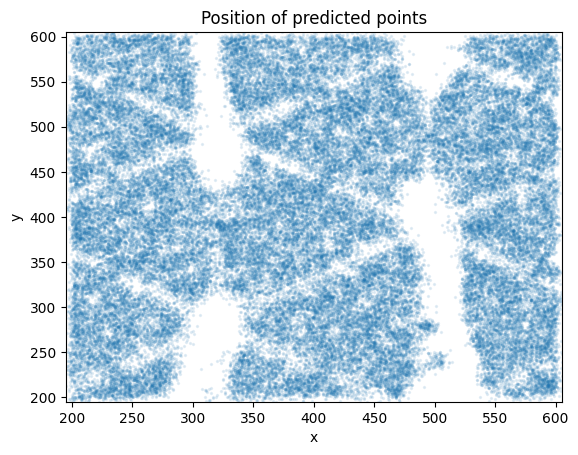

In [97]:
scaler=StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

MLPReg = MLPRegressor(activation="tanh", hidden_layer_sizes=(400), solver="adam", max_iter=400, random_state=rs, verbose=True, early_stopping=True, warm_start=True, tol=1e-5)
MLPReg.fit(X_train_std, Y_train)
Y_pred = MLPReg.predict(X_test_std)
pd.DataFrame(Y_pred, columns=["x", "y"]).plot.scatter("x", "y", alpha=0.1, s=2, title="Position of predicted points", xlim=(195, 605), ylim=(195, 605))
print(f"Neural network regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Iteration number: 0. Current parameters: {'activation': 'tanh', 'hidden_layer_sizes': (400,), 'max_iter': 600, 'solver': 'adam'}
score: 4.377154733070756
Iteration number: 1. Current parameters: {'activation': 'tanh', 'hidden_layer_sizes': (200, 200), 'max_iter': 600, 'solver': 'adam'}
score: 4.16371525976422
Iteration number: 2. Current parameters: {'activation': 'tanh', 'hidden_layer_sizes': (200, 100, 100), 'max_iter': 600, 'solver': 'adam'}
score: 4.229518654469672
Iteration number: 3. Current parameters: {'activation': 'tanh', 'hidden_layer_sizes': (200, 200, 200), 'max_iter': 600, 'solver': 'adam'}
score: 4.245775076104407
Iteration number: 4. Current parameters: {'activation': 'tanh', 'hidden_layer_sizes': (200, 200, 200, 200), 'max_iter': 600, 'solver': 'adam'}
score: 4.376256834559964
Iteration number: 5. Current parameters: {'activation': 'tanh', 'hidden_layer_sizes': (300, 300, 300), 'max_iter': 600, 'solver': 'adam'}
score: 4.432533998569769
Iteration number: 6. Current par

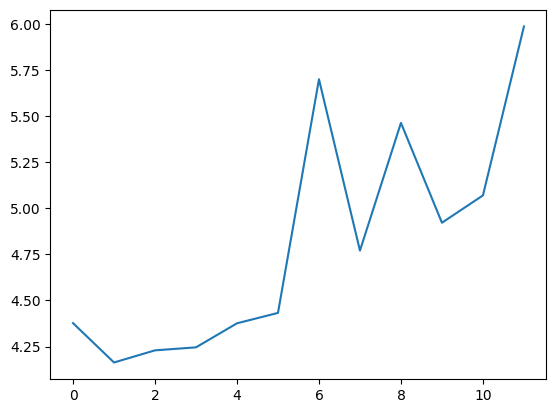

Neural network grid search results. Best params: {'activation': 'tanh', 'hidden_layer_sizes': (200, 200), 'max_iter': 600, 'solver': 'adam'}
Neural network regression. Euclidean distance score: 4.03 


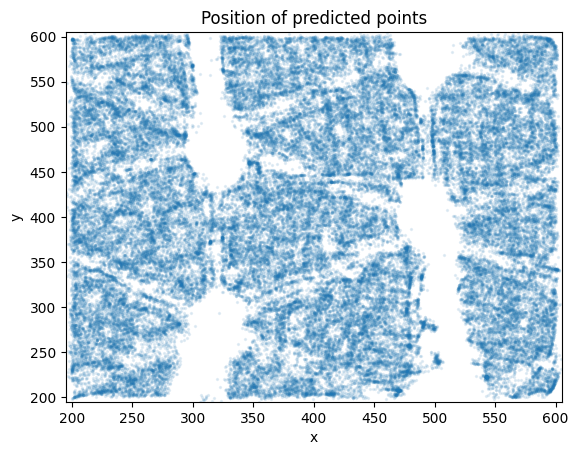

In [101]:
scaler=StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

params = {
    "activation": ["tanh", "relu"],
    "solver" : ["adam"],
    "max_iter": [600],
    "hidden_layer_sizes": [(400,), (200, 200), (200, 100, 100), (200,200,200), (200,200,200,200), (300, 300, 300)]
}

scores = []
iter=0
for config in ParameterGrid(params):
    print(f"Iteration number: {iter}. Current parameters: {config}")
    iter += 1
    reg = MLPRegressor(random_state=rs, early_stopping=False, **config)
    scores.append(cross_val_score(reg, X_train_std, Y_train, cv=3, scoring=euc_dist_scorer).mean())
    print(f"score: {scores[-1]}")
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Neural network grid search results. Best params: {best_params}")

#evaluate on best params
MLPReg = MLPRegressor(random_state=rs, early_stopping=False, **best_params)
MLPReg.fit(X_train_std, Y_train)
Y_pred = MLPReg.predict(X_test_std)
pd.DataFrame(Y_pred, columns=["x", "y"]).plot.scatter("x", "y", alpha=0.1, s=2, title="Position of predicted points", xlim=(195, 605), ylim=(195, 605))
print(f"Neural network regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

In [31]:
Y_pred

NameError: name 'Y_pred' is not defined

## Support vector regression

In [134]:
dataset_sample = dataset.sample(1000, random_state=rs).values
X_train_sampled = dataset_shuff[featuresLabels].values
Y_train_sampled = dataset_shuff[regressionTargets].values

st_scaler = StandardScaler()
X_train_sc = st_scaler.fit_transform(X_train_sampled)
X_test_sc = st_scaler.transform(X_test)

SVReg = MultiOutputRegressor(SVR(kernel="poly", degree=2))
SVReg.fit(X_train_sc, Y_train_sampled)
Y_pred = SVReg.predict(X_test_sc)

print(f"Support vector regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))

Support vector regression. Euclidean distance score: 26.19 


In [ ]:
#support vector regression
st_scaler = StandardScaler()
X_train_sc = st_scaler.fit_transform(X_train)
X_test_sc = st_scaler.transform(X_test)
params = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "degree" : [2, 3]
    #"epsilon": np.arange(0.1, 1.1, 0.2)
}

scores = []
for config in ParameterGrid(params):
    reg = MultiOutputRegressor(SVR(max_iter=100**config))
    scores.append(cross_val_score(reg, X_train_sc, Y_train, cv=5, scoring=euc_dist_scorer).mean())
plt.plot(scores)
plt.show()
best_params = list(ParameterGrid(params))[np.argmin(scores)]
print(f"Support vector regression grid search results. Best params: {best_params}")

#evaluate on best params
SVReg = MultiOutputRegressor(SVR(**best_params))
SVReg.fit(X_train_sc, Y_train)
Y_pred = SVReg.predict(X_test_sc)
print(f"Support vector regression. Euclidean distance score: %.2f "%euc_dist(Y_test, Y_pred))


## Final results

In [102]:
EVALUATIONPATH = "./data/DSL_Winter_Project_2024/DSL_Winter_Project_2024/evaluation.csv"
evaluation = pd.read_csv(EVALUATIONPATH, index_col="Id")
#X_ev = X_ev[generateColumnsNames("area", ignore=noisyIndexes) + generateColumnsNames("pmax", ignore=noisyIndexes)]
X_ev = evaluation[featuresLabels]

MLPReg.set_params(warm_start=False, verbose=True)
stdScaler = StandardScaler()
X_std = stdScaler.fit_transform(X_df.values)
X_ev_std = stdScaler.transform(X_ev.values)

MLPReg.fit(X_std, Y_df.values)
Y_ev = MLPReg.predict(X_ev_std)


Iteration 1, loss = 33666.07523860
Iteration 2, loss = 5614.94146096
Iteration 3, loss = 1855.27375292
Iteration 4, loss = 346.26059545
Iteration 5, loss = 56.18865447
Iteration 6, loss = 18.66950867
Iteration 7, loss = 12.91591422
Iteration 8, loss = 11.55414934
Iteration 9, loss = 10.79020831
Iteration 10, loss = 10.13952888
Iteration 11, loss = 9.79585739
Iteration 12, loss = 9.63232783
Iteration 13, loss = 9.12686035
Iteration 14, loss = 9.03705268
Iteration 15, loss = 8.71323339
Iteration 16, loss = 8.62853558
Iteration 17, loss = 8.42804937
Iteration 18, loss = 8.42630479
Iteration 19, loss = 8.43359147
Iteration 20, loss = 8.16081550
Iteration 21, loss = 7.85113845
Iteration 22, loss = 8.03095154
Iteration 23, loss = 8.21535580
Iteration 24, loss = 7.84670316
Iteration 25, loss = 7.89496418
Iteration 26, loss = 7.76990276
Iteration 27, loss = 7.61777857
Iteration 28, loss = 7.57081760
Iteration 29, loss = 7.57054228
Iteration 30, loss = 7.46654179
Iteration 31, loss = 7.50903959

In [103]:
MLPReg.get_params

<bound method BaseEstimator.get_params of MLPRegressor(activation='tanh', hidden_layer_sizes=(200, 200), max_iter=600,
             random_state=328537, verbose=True)>

In [105]:
output = pd.DataFrame()
Y_ev_df = pd.DataFrame(Y_ev)
display(Y_ev_df)
#output['Predicted'] = (Y_ev_df[0]).round().astype(str) + "|" + (Y_ev_df[1]).round().astype(str)
output['Predicted'] = (Y_ev_df[0]).astype(str) + "|" + (Y_ev_df[1]).astype(str)
output.to_csv("submission10_MLP6.csv", index_label="Id")

,0,1
0,490.693359,326.600452
1,544.072767,577.195666
2,209.187227,396.394743
3,581.184932,511.964795
4,361.854127,361.945079
...,...,...
128495,438.090335,264.269813
128496,280.316311,226.354462
128497,456.882110,589.608047
128498,228.750290,387.441158
